<b>Imports of required libraries</b>

In [5]:
import numpy as np
from scipy.stats import norm, kstest, ks_2samp, shapiro
import statsmodels.api
import matplotlib.pyplot as plt

<b>1. Cumulative distribution plot for specified sample</b>

Text(0, 0.5, 'Probability')

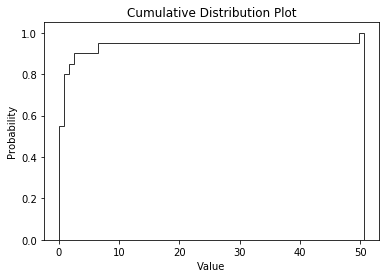

In [31]:
controlB = [0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50,
            0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57]
plt.hist(controlB, 'fd', density=True, cumulative=True, label='CDF',
         histtype='step', alpha=0.8, color='k')
plt.title('Cumulative Distribution Plot')
plt.xlabel('Value')
plt.ylabel('Likelihood of occurrence')

<b>2. Cumulative distribution plot with logarithmic values on x axis</b>

Text(0, 0.5, 'Likelihood of occurrence')

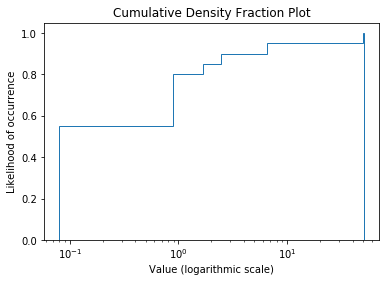

In [48]:
controlB = [0.08, 0.10, 0.15, 0.17, 0.24, 0.34, 0.38, 0.42, 0.49, 0.50,
            0.70, 0.94, 0.95, 1.26, 1.37, 1.55, 1.75, 3.20, 6.98, 50.57]
#plt.hist(controlB, density=True, cumulative=True, label='CDF', histtype='step', alpha=0.8, color='k')
plt.hist(controlB, 'fd', density=True, histtype='step',
                           cumulative=True, label='Empirical')
plt.xscale('log')
plt.title('Cumulative Density Fraction Plot')
plt.xlabel('Value (logarithmic scale)')
plt.ylabel('Likelihood of occurrence')

<b>3. Kolmogorov-Smirnov test for two specified samples</b>

Text(0, 0.5, 'Likelihood of occurrence')

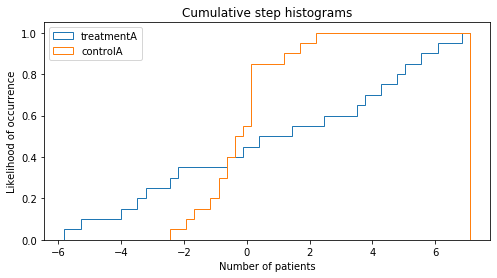

In [50]:
controlA = [0.22, -0.87, -2.39, -1.79, 0.37, -1.54, 1.28, -0.31,
-0.74, 1.72, 0.38, -0.17, -0.62 , -1.10, 0.30, 0.15,
2.30, 0.19, -0.50, -0.09]

treatmentA = [-5.13, -2.19, -2.43, -3.83, 0.50, -3.25, 4.32, 1.63,
5.18, -0.43, 7.11, 4.87, -3.10, -5.81, 3.76, 6.31,
2.58, 0.07, 5.76, 3.50]

fig, ax = plt.subplots(figsize=(8, 4))

n, bins, patches = ax.hist(treatmentA, 50, density=True, histtype='step',
                           cumulative=True, label='treatmentA')

ax.hist(controlA, bins=bins, density=True, histtype='step',
                           cumulative=True, label='controlA')

ax.legend(loc='upper left')
ax.set_title('Cumulative distribution plot')
ax.set_xlabel('Number of patients')
ax.set_ylabel('Likelihood of occurrence')

In [54]:
p, stat = ks_2samp(treatmentA, controlA)
print('Maximum distance between two cumulative distribution plots: \t {0}'.format(p))

Maximum distance between two cumulative distribution plots: 	 0.45


<b>4. Checking the simmilarity and normality of the distributions of two samples</b>